In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
my_path = "/content/gdrive/My Drive/ColabNotebooks/EVA4"

import sys
sys.path.append(my_path)
!ls /content/gdrive/My\ Drive/ColabNotebooks/EVA4

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
dataloader.py  dnn.py	      __pycache__   resnet.py
display.py     evaluation.py  resenet18.py  training.py


In [3]:
%matplotlib inline
import dataloader
import display
import resenet18 
from resnet import ResNet18, disp_summary
import training

import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
!pip install torchsummary
from torchsummary import summary

In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

In [6]:
train_loader, test_loader = dataloader.get_dataloader(batch_size=batch_size, num_workers=4)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


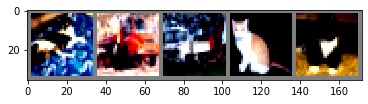

In [7]:
display.show_random_images(train_loader, classes)

In [8]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
net = ResNet18()
model=net.to(device)
summary(model, input_size=(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

/content/gdrive/My Drive/ColabNotebooks/EVA4/resnet.py:107: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = OneCycleLR(optimizer,max_lr=0.4,total_steps=40)


EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, train_loader, optimizer, criterion, epoch)
    training.test_model(model, device, criterion, test_loader)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/content/gdrive/My Drive/ColabNotebooks/EVA4/resnet.py:107: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=0.027753721922636032 Batch_id=390 Accuracy=98.93: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8251/10000 (82.51%)

EPOCH: 2


Loss=0.010260083712637424 Batch_id=390 Accuracy=98.85: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8272/10000 (82.72%)

EPOCH: 3


Loss=0.020850826054811478 Batch_id=390 Accuracy=98.91: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8196/10000 (81.96%)

EPOCH: 4


Loss=0.02173461765050888 Batch_id=390 Accuracy=99.09: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8275/10000 (82.75%)

EPOCH: 5


Loss=0.11625643074512482 Batch_id=390 Accuracy=99.20: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8290/10000 (82.90%)

EPOCH: 6


Loss=0.08008846640586853 Batch_id=390 Accuracy=99.25: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 8323/10000 (83.23%)

EPOCH: 7


Loss=0.0007370429229922593 Batch_id=390 Accuracy=99.31: 100%|██████████| 391/391 [00:56<00:00,  6.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 8351/10000 (83.51%)

EPOCH: 8


Loss=0.08187849819660187 Batch_id=390 Accuracy=99.30: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8270/10000 (82.70%)

EPOCH: 9


Loss=0.0052136266604065895 Batch_id=390 Accuracy=99.32: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8335/10000 (83.35%)

EPOCH: 10


Loss=0.03889889270067215 Batch_id=390 Accuracy=99.41: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8349/10000 (83.49%)

EPOCH: 11


Loss=0.009857246652245522 Batch_id=390 Accuracy=99.42: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8285/10000 (82.85%)

EPOCH: 12


Loss=0.11416240781545639 Batch_id=390 Accuracy=99.54: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8286/10000 (82.86%)

EPOCH: 13


Loss=0.013572250492870808 Batch_id=390 Accuracy=99.42: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8259/10000 (82.59%)

EPOCH: 14


Loss=0.0013188093435019255 Batch_id=390 Accuracy=99.47: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8303/10000 (83.03%)

EPOCH: 15


Loss=0.024402689188718796 Batch_id=390 Accuracy=99.46: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8331/10000 (83.31%)

EPOCH: 16


Loss=0.01576220616698265 Batch_id=390 Accuracy=99.54: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8309/10000 (83.09%)

EPOCH: 17


Loss=0.007304195314645767 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8374/10000 (83.74%)

EPOCH: 18


Loss=0.05251642316579819 Batch_id=390 Accuracy=99.59: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 8349/10000 (83.49%)

EPOCH: 19


Loss=0.015388483181595802 Batch_id=390 Accuracy=99.59: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8292/10000 (82.92%)

EPOCH: 20


Loss=0.063304603099823 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [00:55<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8359/10000 (83.59%)

EPOCH: 21


Loss=0.16210320591926575 Batch_id=390 Accuracy=99.60: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8293/10000 (82.93%)

EPOCH: 22


Loss=0.0018317945068702102 Batch_id=390 Accuracy=99.61: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8341/10000 (83.41%)

EPOCH: 23


Loss=0.0030232518911361694 Batch_id=390 Accuracy=99.65: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8341/10000 (83.41%)

EPOCH: 24


Loss=0.007353048771619797 Batch_id=390 Accuracy=99.68: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8384/10000 (83.84%)

EPOCH: 25


Loss=0.01266248244792223 Batch_id=390 Accuracy=99.71: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8395/10000 (83.95%)

EPOCH: 26


Loss=0.004111883230507374 Batch_id=390 Accuracy=99.63: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8397/10000 (83.97%)

EPOCH: 27


Loss=0.0009494447149336338 Batch_id=390 Accuracy=99.78: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8409/10000 (84.09%)

EPOCH: 28


Loss=0.0035174060612916946 Batch_id=390 Accuracy=99.76: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8339/10000 (83.39%)

EPOCH: 29


Loss=0.02053365670144558 Batch_id=390 Accuracy=99.76: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8338/10000 (83.38%)

EPOCH: 30


Loss=0.01935887336730957 Batch_id=390 Accuracy=99.72: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]



Test set: Average loss: 0.0074, Accuracy: 8391/10000 (83.91%)

